In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as mtp

In [2]:
data = pd.read_csv('heart_failure.csv')

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


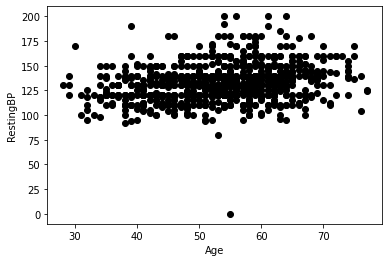

In [10]:
X = data[["RestingBP","Age"]]
#Visualise data points
mtp.scatter(X["Age"],X["RestingBP"],c='black')
mtp.xlabel('Age')
mtp.ylabel('RestingBP')
mtp.show()

C:\Users\Kawsikan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


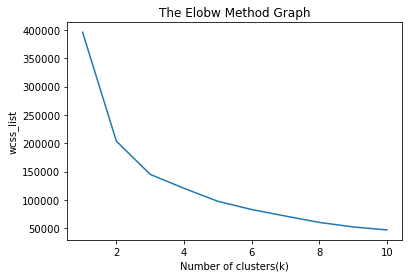

In [11]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

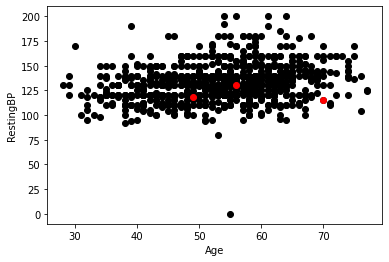

In [14]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3
# Select random observation as centroids
Centroids = (X.sample(n=K))
mtp.scatter(X["Age"],X["RestingBP"],c='black')
mtp.scatter(Centroids["Age"],Centroids["RestingBP"],c='red')
mtp.xlabel('Age')
mtp.ylabel('RestingBP')
mtp.show()

In [15]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Age"]-row_d["Age"])**2
            d2=(row_c["RestingBP"]-row_d["RestingBP"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["RestingBP","Age"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['RestingBP'] - Centroids['RestingBP']).sum() + (Centroids_new['Age'] - Centroids['Age']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["RestingBP","Age"]]

C:\Users\Kawsikan\AppData\Local\Temp/ipykernel_26276/1353362878.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
C:\Users\Kawsikan\AppData\Local\Temp/ipykernel_26276/1353362878.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


3.851522189578489
4.345923995834426
5.7118431255852045
1.8144501075148867
0.16005865226903637
0.40822089825250885
-0.47703338797455785
-0.2428002901872759
-1.0837222222200893
0.6342520476319535
-1.1320674856072088
-0.14607021390531827
-0.1954328397922822
-0.3677144107087642
-0.01916191045143023
0.4791513068811355
0.38569538833177575
-0.2205410763054445
1.0661925562483816
4.5988607234575625
5.132181841502003
3.3650952546372395
2.542721260517858
1.6312175598655259
1.6603372757130046
0.47499467652536254
0.3960608845368725
0.3860949557036122
0.08028603394352984
0.0


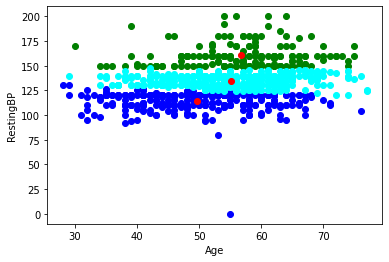

In [18]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    mtp.scatter(data["Age"],data["RestingBP"],c=color[k])
mtp.scatter(Centroids["Age"],Centroids["RestingBP"],c='red')
mtp.xlabel('Age')
mtp.ylabel('RestingBP')
mtp.show()